In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
#Load the dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

They are no missing data from the dataset as shown, With 284807 transactions taken place

In [6]:
df['Amount'].sum()

25162590.009999998

The total amount of money during these transactions is 25162590.009999998 

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

492 transactions are flagged as fraud, while 284315 transactions are not fraud

To see the amount on each fraud and not fraud transactions

In [8]:
df.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

60127.97 was lost to fraud transactions

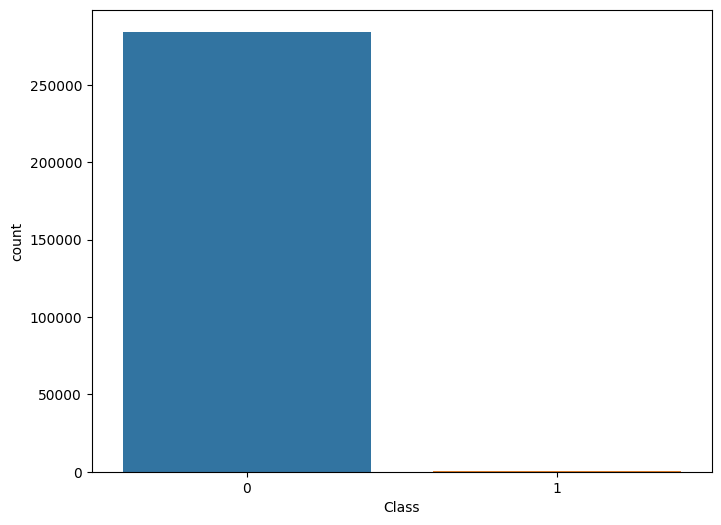

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class',data = df)
plt.show()

**Model Training And Evaluation**

In this dataset will split into features (X) and the target variable (y), where 'Class' represents the fraud status (1 for fraud, 0 for non-fraud).

In [10]:
# Separate features and target variable
x = df.drop('Class', axis=1)
y = df['Class']

The dataset is further split into training and testing sets using 20% on the testing data and the rest on training data to build our model. Set the parameter test_size to 0.2 and random_state to 42

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [12]:
y_test.shape

(56962,)

Now to create a Logistic Regression Object

In [13]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
#Build a Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [15]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(x_test)

In [16]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Confusion Matrix:
 [[56855     9]
 [   41    57]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



From the classification report the model does well in the aspect of predicting non-fradulent transactionsin predicting fraudlent transactions with its high precision indicating that the model has a low false positive rate which helps in maintaing customer relations but its low recall score indicates that the model has a high false negative rate. Another classifier will be used to determine which does better

Next to build a Random Forest Classifer

In [17]:
# Build a Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Make predictions on the test set
y_pred_rf = model_rf.predict(x_test)

In [19]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[56862     2]
 [   23    75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



From the classification report the model does well in predicting of non-fradulent transactions and its good in predicting fraudlent transactions with its high precision indicating that the model has a low false positive rate which helps in maintaing customer relations it also has good recall score which indicates that the model minimizes the chance of missing fraudlent transactions cases (predicting false negatives).

Now to comparing the performance of the two models

In [20]:
# Display the performance metrics for all two models
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)]
precisions = [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)]
recalls = [recall_score(y_test, y_pred_lr),recall_score(y_test, y_pred_rf)]
f1_scores = [ f1_score(y_test, y_pred_lr),f1_score(y_test, y_pred_rf)]

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.999122   0.863636  0.581633  0.695122
1        Random Forest  0.999561   0.974026  0.765306  0.857143


After comparison of both models the model_rf is the better model to use in this case